### Objective:

Fine needle aspirations is a method for examining a small amount of tissue from the tumor. With fine needle aspirations, we can examine the characteristics of individual cells and diagnose breast cancer. Here, we classify breast cancer tumor as **malignant** or **benign** based on cell nuclear features such as **radius**, **perimeter**, **area**, **compactness**, **smoothness**, **concavity**, **concave points**, **symmetry**, **fractal dimension**, and **texture**. 

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay


In [26]:
# Fetch the breast cancer dataset
breast_cancer_diag = fetch_ucirepo(id=17) 

# Extract data in original form, features and targets
breast_cancer_df = breast_cancer_diag.data.original
breast_cancer_X = breast_cancer_diag.data.features 
breast_cancer_y = breast_cancer_diag.data.targets

# Show metadata 
breast_cancer_metadata = breast_cancer_diag.metadata
for key, value in breast_cancer_metadata.items():
    print(f"{key} : {value}")

# Show variable information
breast_cancer_variables = breast_cancer_diag.variables
display(breast_cancer_variables)

uci_id : 17
name : Breast Cancer Wisconsin (Diagnostic)
repository_url : https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
data_url : https://archive.ics.uci.edu/static/public/17/data.csv
abstract : Diagnostic Wisconsin Breast Cancer Database.
area : Health and Medicine
tasks : ['Classification']
characteristics : ['Multivariate']
num_instances : 569
num_features : 30
feature_types : ['Real']
demographics : []
target_col : ['Diagnosis']
index_col : ['ID']
has_missing_values : no
missing_values_symbol : None
year_of_dataset_creation : 1993
last_updated : Fri Nov 03 2023
dataset_doi : 10.24432/C5DW2B
creators : ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street']
intro_paper : {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53f0fbb425bc14468eb3bf96b2e1d41ba8087f36', 'doi': '10.1117/1

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Categorical,None,None,None,no
1,Diagnosis,Target,Categorical,None,None,None,no
2,radius1,Feature,Continuous,None,None,None,no
3,texture1,Feature,Continuous,None,None,None,no
4,perimeter1,Feature,Continuous,None,None,None,no
5,area1,Feature,Continuous,None,None,None,no
6,smoothness1,Feature,Continuous,None,None,None,no
7,compactness1,Feature,Continuous,None,None,None,no
8,concavity1,Feature,Continuous,None,None,None,no
9,concave_points1,Feature,Continuous,None,None,None,no


In [27]:
# Check info
breast_cancer_df.info()
breast_cancer_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [28]:
# Check for missing values and duplicates

breast_cancer_null = breast_cancer_df.isnull().sum()
print(f"Number of missing values in dataframe: {breast_cancer_null.sum()}")

breast_cancer_dups = breast_cancer_df.duplicated().sum()
print(f"Number of duplicate rows in dataframe: {breast_cancer_dups}")

Number of missing values in dataframe: 0
Number of duplicate rows in dataframe: 0


In [29]:
# Check for unique values in each column

breast_cancer_columns = breast_cancer_df.columns
print("Number of Unique Values per Column")
for column in breast_cancer_columns:
    print(f"{column}: {breast_cancer_df[column].nunique()}")

Number of Unique Values per Column
ID: 569
radius1: 456
texture1: 479
perimeter1: 522
area1: 539
smoothness1: 474
compactness1: 537
concavity1: 537
concave_points1: 542
symmetry1: 432
fractal_dimension1: 499
radius2: 540
texture2: 519
perimeter2: 533
area2: 528
smoothness2: 547
compactness2: 541
concavity2: 533
concave_points2: 507
symmetry2: 498
fractal_dimension2: 545
radius3: 457
texture3: 511
perimeter3: 514
area3: 544
smoothness3: 411
compactness3: 529
concavity3: 539
concave_points3: 492
symmetry3: 500
fractal_dimension3: 535
Diagnosis: 2


In [30]:
# Remove the 'id' column
breast_cancer_df = breast_cancer_df.drop('ID', axis=1)
display(breast_cancer_df.columns)

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

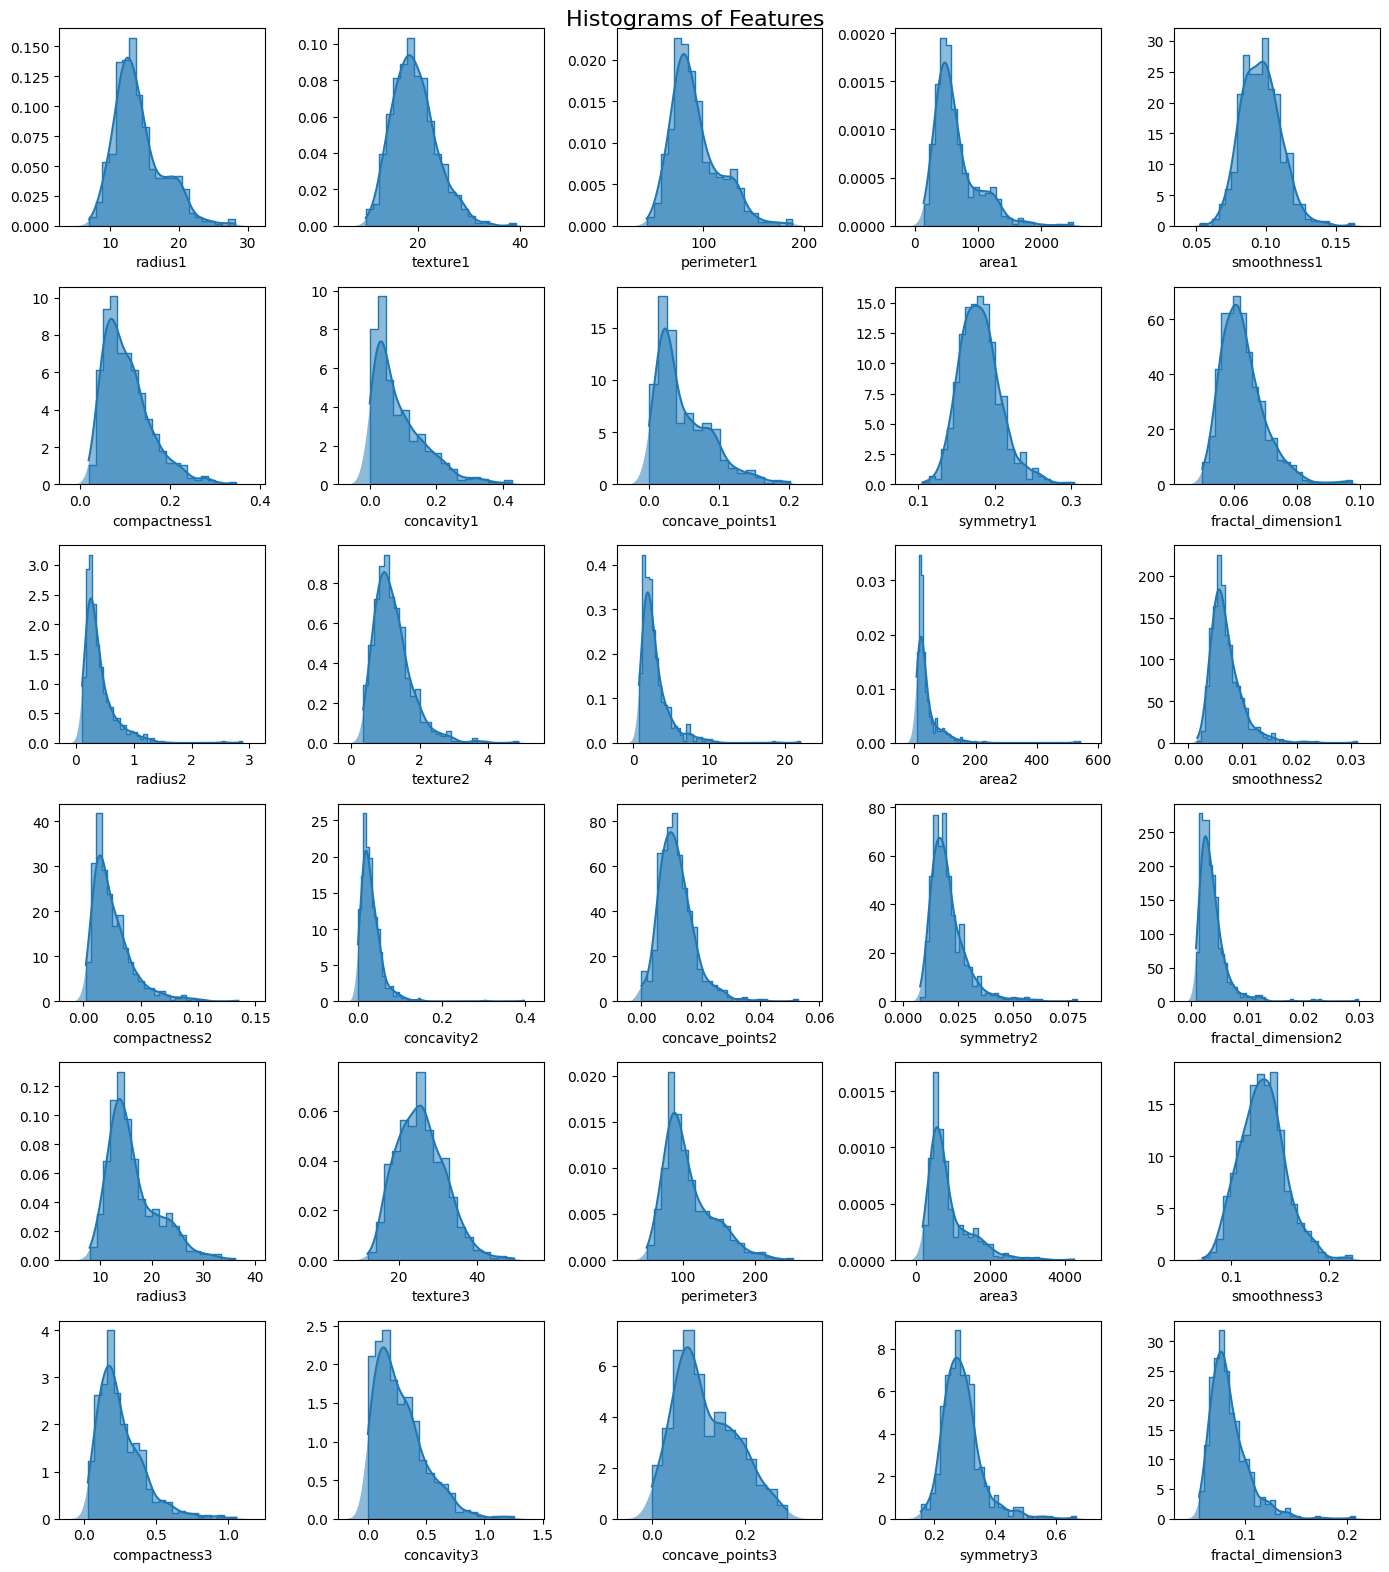

In [31]:
# Histograms of features with KDE

fig, axes = plt.subplots(6, 5, figsize=(14,16))

for i, ax in enumerate(axes.flatten()):
    column = breast_cancer_X.columns[i]
    sns.histplot(data=breast_cancer_X, x=column, element="step", stat="density", common_norm=False, ax=ax, kde=True)
    sns.kdeplot(data=breast_cancer_X, x=column, fill=True, common_norm=False, alpha=.5, linewidth=0, ax=ax)
    ax.set_ylabel("") 
fig.suptitle("Histograms of Features", fontsize=16)
plt.tight_layout()
plt.show()

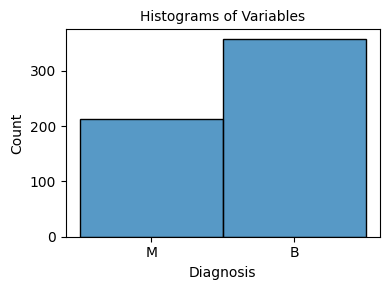

In [32]:
# Histograms of target

plt.figure(figsize=(4, 3))
sns.histplot(data=breast_cancer_y, x="Diagnosis", kde=False)
ax.set_ylabel("") 
plt.title("Histograms of Variables", fontsize=10)
plt.tight_layout()
plt.show()

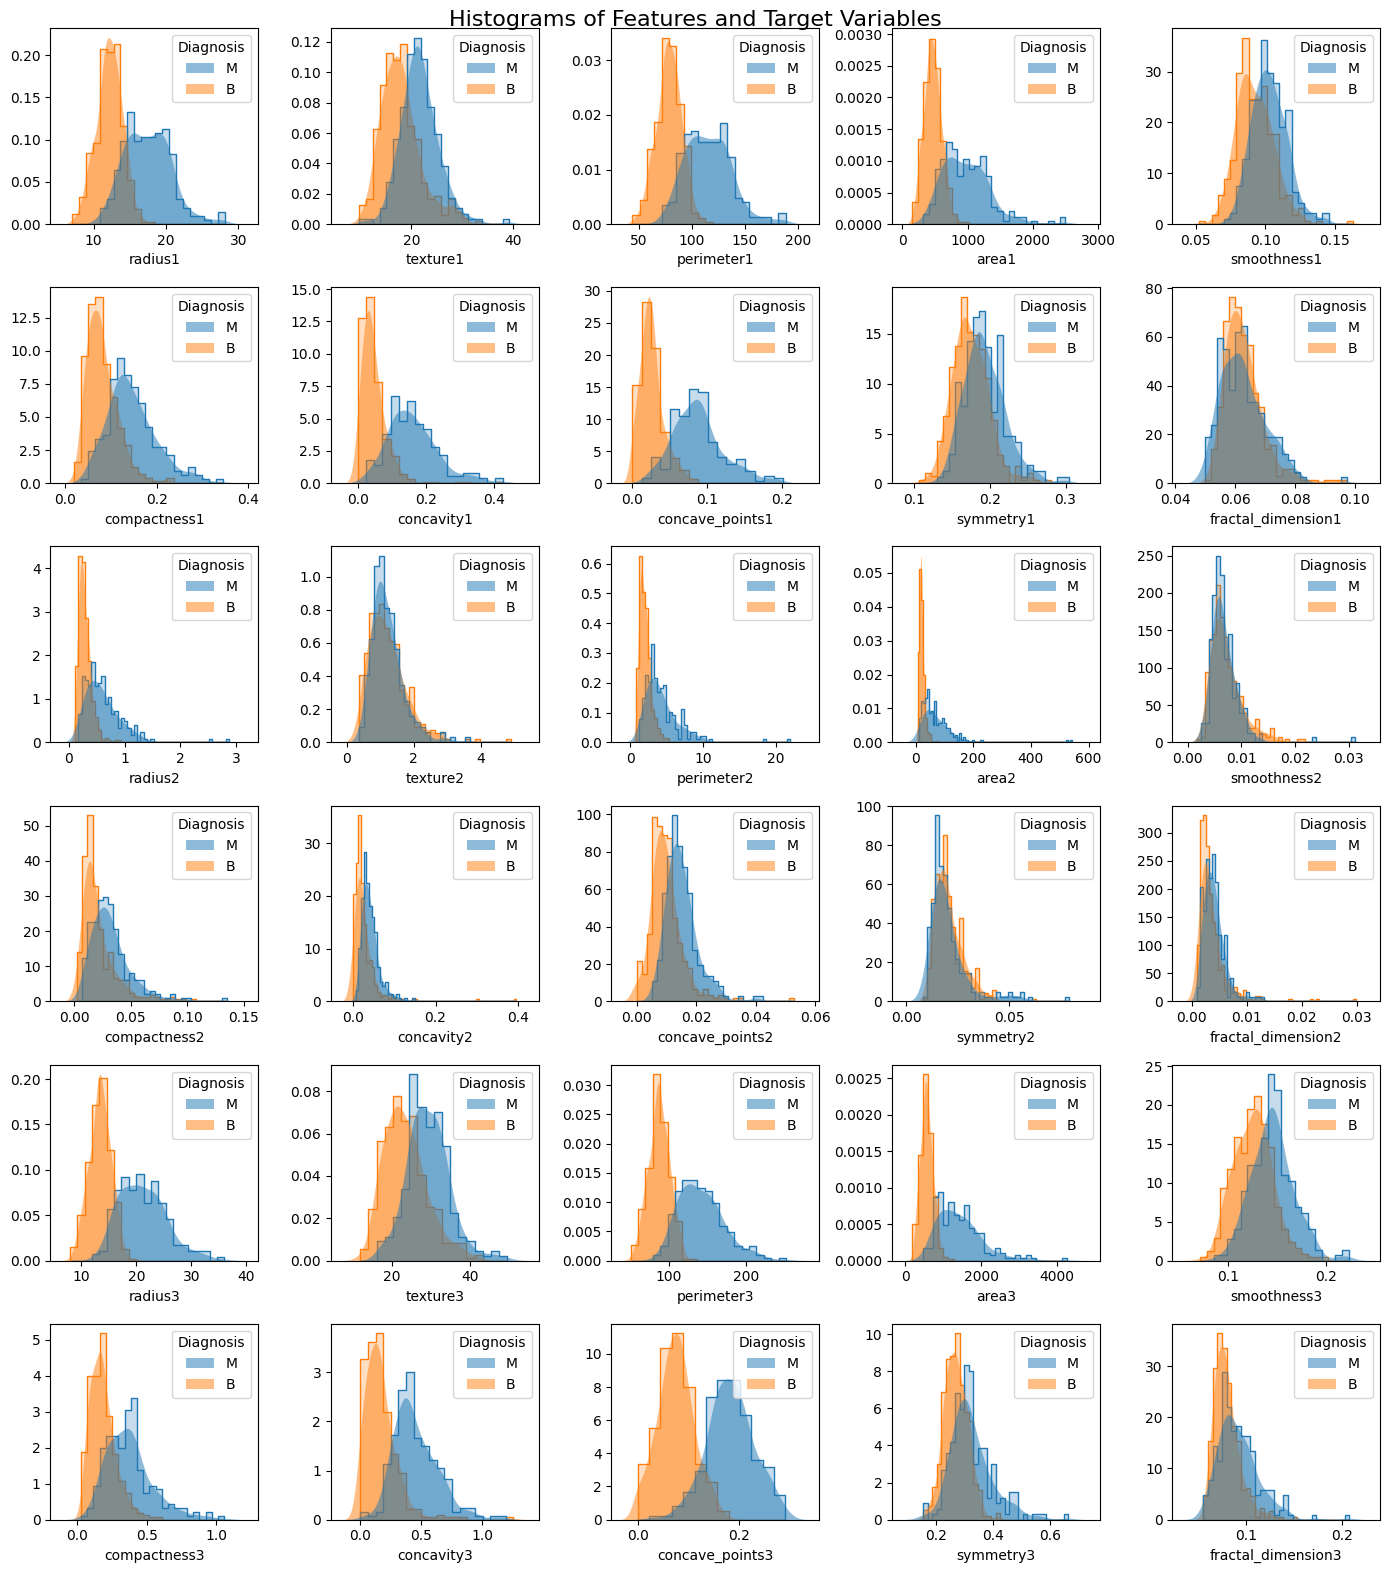

In [33]:
# Histograms of features and target variables with KDE and color based on target variable

fig, axes = plt.subplots(6, 5, figsize=(14,16))

for i, ax in enumerate(axes.flatten()):
    column = breast_cancer_df.columns[i]
    sns.histplot(data=breast_cancer_df, x=column, hue="Diagnosis", element="step", stat="density", common_norm=False, ax=ax)
    sns.kdeplot(data=breast_cancer_df, x=column, hue="Diagnosis", fill=True, common_norm=False, alpha=.5, linewidth=0, ax=ax)
    ax.set_ylabel("") 
fig.suptitle("Histograms of Features and Target Variables", fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\maryn\AppData\Local\Temp\ipykernel_12692\1803907446.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(breast_cancer_df.corr(), cmap="coolwarm", annot=False)


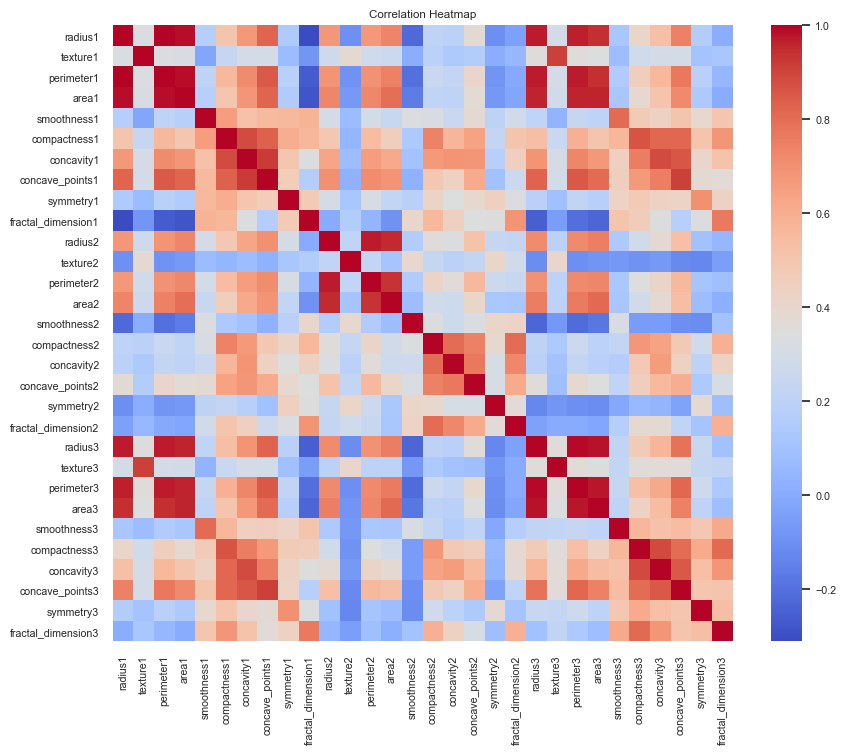

In [34]:
# Correlation Heatmap of features and target variables
sns.set(font_scale=0.7)
plt.figure(figsize=(10, 8))
sns.heatmap(breast_cancer_df.corr(), cmap="coolwarm", annot=False) 
plt.title('Correlation Heatmap')
plt.show() 

In [35]:
# Check column names of features and targets

breast_cancer_X_columns = breast_cancer_X.columns
breast_cancer_y_columns = breast_cancer_y.columns
print(f"Features: {breast_cancer_X_columns}")
print(f"Targets: {breast_cancer_y_columns}")

Features: Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')
Targets: Index(['Diagnosis'], dtype='object')


In [36]:
print(f"Diagnosis")
print(breast_cancer_y["Diagnosis"].value_counts(ascending=False))

# Replace the target variable values with 0 and 1

breast_cancer_y = breast_cancer_y.replace({'B': 0, 'M': 1})
breast_cancer_y = breast_cancer_y["Diagnosis"]
print(breast_cancer_y.value_counts())

Diagnosis
B    357
M    212
Name: Diagnosis, dtype: int64
0    357
1    212
Name: Diagnosis, dtype: int64


In [37]:
# Split the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(breast_cancer_X, breast_cancer_y, test_size=0.3, random_state=69, stratify=breast_cancer_y)

print(f"Training X Set: {x_train.shape}")
print(f"Training Y Set: {y_train.shape}")
print(f"Test X Set: {x_test.shape}")
print(f"Test Y Set: {y_test.shape}")

Training X Set: (398, 30)
Training Y Set: (398,)
Test X Set: (171, 30)
Test Y Set: (171,)


In [38]:
# Train a Logistic Regression model

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())]).fit(x_train, y_train)

# Extract train and test accuracy of the model
accuracy_train = pipeline.score(x_train, y_train)
accuracy_test = pipeline.score(x_test, y_test)

# Extract predictions of the model
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

# Extract the model's probabilities

y_train_prob = pipeline.predict_proba(x_train)[:, 1]
y_test_prob = pipeline.predict_proba(x_test)[:, 1]

# Extract the model's coefficients and intercept

coefficients = pipeline.named_steps['model'].coef_.ravel()
intercept = pipeline.named_steps['model'].intercept_

<mark> After fitting the data, what is the model’s training and testing accuracy? </mark>

In [39]:
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
print("")
print(f'Train Accuracy: {accuracy_train:.3f}')
print(f'Test Accuracy: {accuracy_test:.3f}')

Coefficients: [ 0.29759412  0.48013001  0.30070769  0.36886712 -0.02204957 -0.44161715
  1.02675867  0.8492042  -0.00876413 -0.11586037  1.08424063 -0.24015573
  0.41420999  0.99858452  0.33323394 -0.99311491 -0.18523411  0.34463352
 -0.39266833 -0.52998584  0.85900864  1.22468973  0.68382411  0.87810884
  0.57115916 -0.20050278  1.03791175  0.80245863  0.91354593  0.09413408]
Intercept: [-0.34418091]

Train Accuracy: 0.987
Test Accuracy: 0.982


<mark> Which features are most important? </mark>

In [40]:
# Rank the features based on their coefficients

abs_coefficients = abs(coefficients)
coefficients_rank = pd.DataFrame({"name": x_train.columns, "abs coefficients": abs_coefficients, "coefficients": coefficients})
coefficients_rank = coefficients_rank.sort_values(by="abs coefficients", ascending=False)
coefficients_rank = coefficients_rank.reset_index(drop=True)

# Add feature description and type columns

coefficients_rank['feature'] = coefficients_rank['name'].str.extract('([A-Za-z]+)')
coefficients_rank['type'] = coefficients_rank['name'].str.extract('(\d+)')
coefficients_rank = coefficients_rank.replace({'1': 'mean val', '2': 'extreme', '3': 'standard error'})
coefficients_rank = coefficients_rank.round({'abs coefficients': 3, 'coefficients': 3})

display(coefficients_rank)

,name,abs coefficients,coefficients,feature,type
0,texture3,1.225,1.225,texture,standard error
1,radius2,1.084,1.084,radius,extreme
2,concavity3,1.038,1.038,concavity,standard error
3,concavity1,1.027,1.027,concavity,mean val
4,area2,0.999,0.999,area,extreme
5,compactness2,0.993,-0.993,compactness,extreme
6,symmetry3,0.914,0.914,symmetry,standard error
7,area3,0.878,0.878,area,standard error
8,radius3,0.859,0.859,radius,standard error
9,concave_points1,0.849,0.849,concave,mean val


In [41]:
# Extract the top 20 features with the highest coefficients

coefficients_top20 = coefficients_rank[:20]
coefficients_top20_list = list(coefficients_top20["name"])
display(coefficients_top20)
print(coefficients_top20_list)

,name,abs coefficients,coefficients,feature,type
0,texture3,1.225,1.225,texture,standard error
1,radius2,1.084,1.084,radius,extreme
2,concavity3,1.038,1.038,concavity,standard error
3,concavity1,1.027,1.027,concavity,mean val
4,area2,0.999,0.999,area,extreme
5,compactness2,0.993,-0.993,compactness,extreme
6,symmetry3,0.914,0.914,symmetry,standard error
7,area3,0.878,0.878,area,standard error
8,radius3,0.859,0.859,radius,standard error
9,concave_points1,0.849,0.849,concave,mean val


['texture3', 'radius2', 'concavity3', 'concavity1', 'area2', 'compactness2', 'symmetry3', 'area3', 'radius3', 'concave_points1', 'concave_points3', 'perimeter3', 'smoothness3', 'fractal_dimension2', 'texture1', 'compactness1', 'perimeter2', 'symmetry2', 'area1', 'concave_points2']


In [42]:
# Pivot tables based on feature and type

feature_pivot = pd.pivot_table(coefficients_rank, index='feature', columns='type', values='abs coefficients', aggfunc='mean', margins=True, margins_name='mean')
feature_pivot = feature_pivot.sort_values(by='mean', ascending=False)
feature_pivot = feature_pivot.drop('mean', axis=1)
feature_pivot = feature_pivot.drop('mean', axis=0)
display(feature_pivot)

number_pivot = pd.pivot_table(coefficients_rank, index='type', columns='feature', values='abs coefficients', aggfunc='mean', margins=True, margins_name='mean')
number_pivot = number_pivot.sort_values(by='mean', ascending=False)
number_pivot = number_pivot.drop('mean', axis=1)
number_pivot = number_pivot.drop('mean', axis=0)
display(number_pivot)

type,extreme,mean val,standard error
feature,,,
concavity,0.185,1.027,1.038
area,0.999,0.369,0.878
radius,1.084,0.298,0.859
concave,0.345,0.849,0.802
texture,0.240,0.480,1.225
compactness,0.993,0.442,0.201
perimeter,0.414,0.301,0.684
symmetry,0.393,0.009,0.914
smoothness,0.333,0.022,0.571


feature,area,compactness,concave,concavity,fractal,perimeter,radius,smoothness,symmetry,texture
type,,,,,,,,,,
standard error,0.878,0.201,0.802,1.038,0.094,0.684,0.859,0.571,0.914,1.225
extreme,0.999,0.993,0.345,0.185,0.530,0.414,1.084,0.333,0.393,0.240
mean val,0.369,0.442,0.849,1.027,0.116,0.301,0.298,0.022,0.009,0.480


<mark> Make a result for both training and test data, separately. </mark>
1. Generate a confusion matrix
2. Calculate the other metrics: F1-score, Precision, Recall, and False alarm rate. 
3. Plot the ROC curve.
4. Report the AUC. 

In [43]:
# Create a confusion matrix for the training and test sets
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

# Evaluation metrics for training set
tn_train, fp_train, fn_train, tp_train = confusion_matrix_train.ravel()
precision_train = (tp_train) / (tp_train + fp_train)
recall_train =  (tp_train) / (tp_train + fn_train)
f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
false_alarm_rate_train = fp_train / (fp_train + tn_train)
missed_detection_rate_train = fn_train / (fn_train + tp_train)

# Evaluation metrics for test set
tn_test, fp_test, fn_test, tp_test = confusion_matrix_test.ravel()
precision_test = (tp_test) / (tp_test + fp_test)
recall_test =  (tp_test) / (tp_test + fn_test)
f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
false_alarm_rate_test = fp_test / (fp_test + tn_test)
missed_detection_rate_test = fn_test / (fn_test + tp_test) 

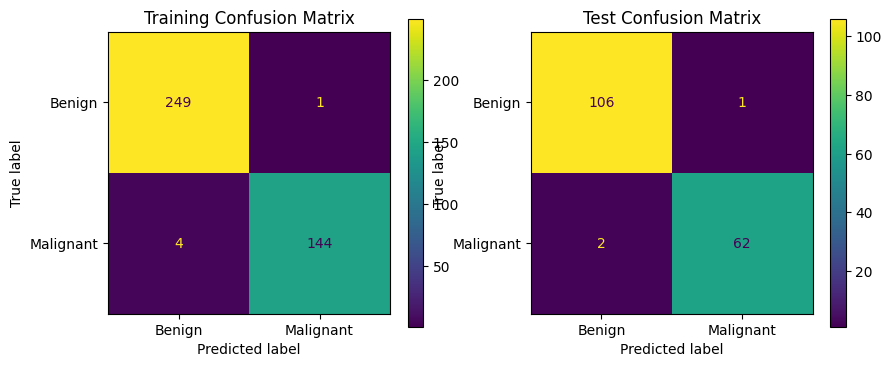

Evaluation metrics for training and test set


,Dataset,Mean Accuracy,False Alarm Rate,Missed Detection Rate,Precision,Recall,F1 Score
0,Train,0.987,0.004,0.027,0.993,0.973,0.983
1,Test,0.982,0.009,0.031,0.984,0.969,0.976


In [44]:
# Confusion Matrix for training and test set

plt.rcdefaults()
fig, ax = plt.subplots(1, 2, figsize=(10, 4))


cm_display_train = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = ["Benign", "Malignant"])
cm_display_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = ["Benign", "Malignant"])

cm_display_train.plot(ax=ax[0])
ax[0].set_title('Training Confusion Matrix')
cm_display_test.plot(ax=ax[1])
ax[1].set_title('Test Confusion Matrix')

plt.show()

# Create a dataframe with the evaluation metrics 

evaluation_data = {
    'Dataset': ['Train', 'Test'],
    'Mean Accuracy' : [accuracy_train, accuracy_test],
    'False Alarm Rate': [false_alarm_rate_train, false_alarm_rate_test],
    'Missed Detection Rate': [missed_detection_rate_train, missed_detection_rate_test],
    'Precision': [precision_train, precision_test],
    'Recall': [recall_train, recall_test],
    'F1 Score': [f1_score_train, f1_score_test]}

evaluation_data = pd.DataFrame(evaluation_data)
evaluation_data = evaluation_data .round({'Mean Accuracy': 3, 'False Alarm Rate': 3, 'Missed Detection Rate':3, 'Precision': 3, 'Recall': 3, 'F1 Score': 3})
print("Evaluation metrics for training and test set")
display(evaluation_data)

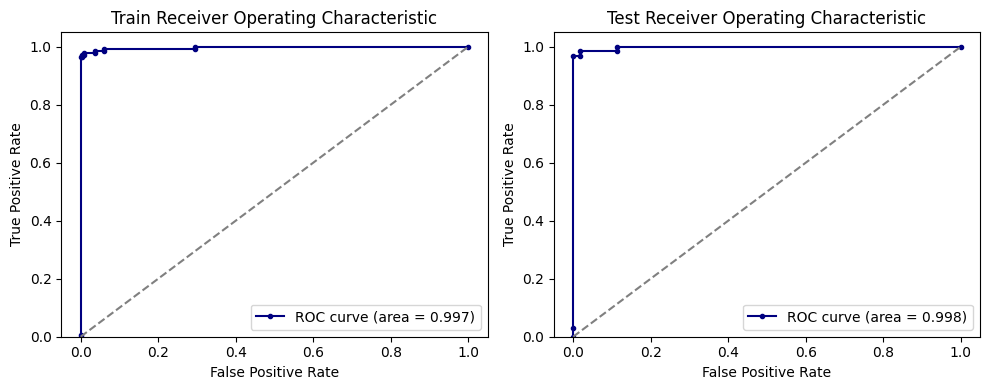

In [45]:
fpr_train, tpr_train, _train = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

fpr_test, tpr_test, _test = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot ROC curve for training data
ax[0].plot(fpr_train, tpr_train, marker = '.', color='navy',label='ROC curve (area = %0.3f)' % roc_auc_train)
ax[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Train Receiver Operating Characteristic')
ax[0].legend(loc="lower right")

# Plot ROC curve for test data 
ax[1].plot(fpr_test, tpr_test, marker = '.', color='navy',label='ROC curve (area = %0.3f)' % roc_auc_test)
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Test Receiver Operating Characteristic')
ax[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

<mark> What insights did you gain? </mark>

### Summary Insights

**Model Development**
- Stratify ensures that the proportion of classes in training and testing data is the same as the proportion in original data, reducing bias.
- Logistic regression predicts the probability of a binary outcome using a logistic function. In this case, we want to classify tumor either as benign or malignant. 

**Accuracy Evaluation**
- Model performed well on both train and test data.
- Model achieved higher accuracy, lower false alarm rate, lower missed detection rate, higher precision, higher recall and higher f1 score on the train data as expected.
- Close training accuracy and testing accuracy: Overfitting is highly likely to be avoided.
- High accuracy on testing data: good generalization ability
- High accuracy: correctly predicted the class of most tumors

**Coefficients Ranking**
- Most influential features are concavity, area, radius, concave, and texture, in descending order. 
- The following statistics of these features can be used, in descending order of priority: standard error, extreme values, and mean values.
- Specifically, the best indicators are the mean and standard error of the cell concavity, the maximum of the cell area, the mean and standard error of the cell radius, and the standard error of the cell texture.

**Confusion Matrix**
- Testing Data:
    - TN: 249
    - FN: 1
    - TP: 144
    - FP: 4
- Training Data:
    - TN: 106
    - FN: 1
    - TP: 62
    - FP: 2

**Other Evaluation Metrics**
- Model performed well on both train and test data.
- Low false alarm rate: rarely misclassified benign tumors as malignant
- Low missed detection rate: rarely failed to detect malignant tumors
- High precision: most of the tumors that it predicted to be malignant were actually malignant
- High recall: it captured most of the actual malignant tumors
- High F1 score: effectively balances recall and precision
- If we want to minimize false negatives as they have serious consequences for the patient's health, we want to minimuze false negatives and we prioritize a classifier with high recall and low missed detection rate.
- If we want to avoid causing uncessary treatment for the patient, we want to minimize false positives and we prioritize a classifier with high precision and low false alarm rate.
- These 2 situations are balanced with a high f1 score. 

**ROC Curve**
- Model demonstrated high trustworthiness as a classifier
- High AUC and high proximity to the point (0,1) on the ROC curve 
- Model had a high true positive rate and a low false positive rate. It was able to correctly identify most of the positive cases and avoid misclassifying most of the negative cases.
- AUC of testing data is higher than AUC of training data. This may imply that the performance is sensitive to the splitting of data. Thus, it is recommended to check other training and testing split techniques.